In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
data = pd.read_csv('C:\\Users\\91831\\OneDrive\\Desktop\\BharatIntern-MachineLearning-main\\house_data.csv')
print(data.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [4]:
data.isnull().sum()
data.describe()
data.describe(include=['O'])

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


<Axes: xlabel='area_type', ylabel='count'>

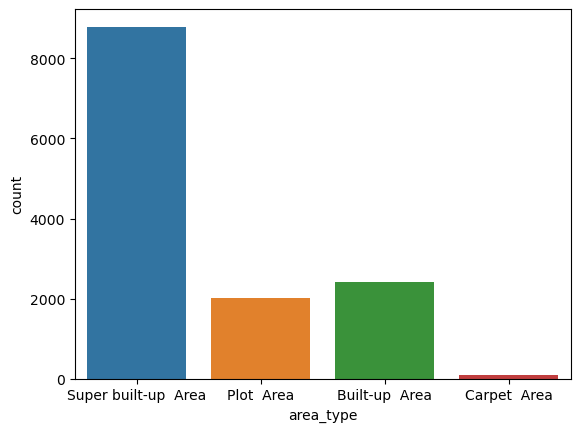

In [10]:
data['area_type'].value_counts()
sns.countplot(x='area_type', data=data)


<Axes: xlabel='balcony', ylabel='count'>

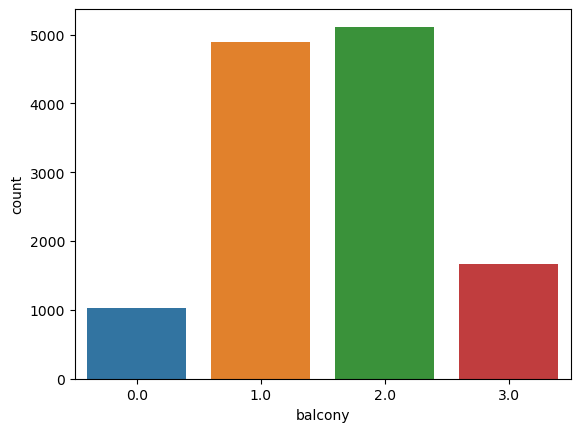

In [13]:
data['balcony'].value_counts()
sns.countplot(x='balcony', data=data)

<Axes: xlabel='price', ylabel='Count'>

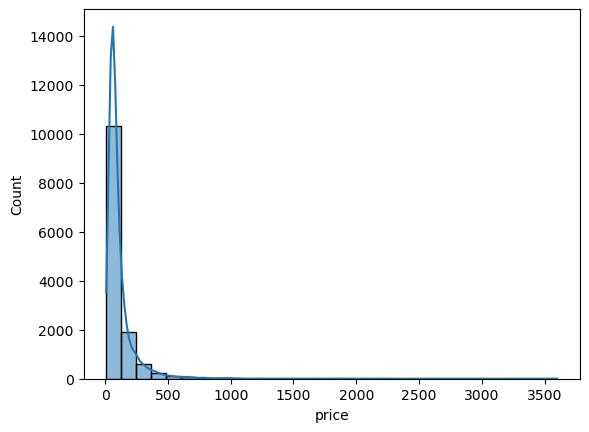

In [15]:
sns.histplot(x='price', data=data, kde=True, bins=30)


In [16]:
data['size'].unique()
data['society'].value_counts()
sum(data['society'].value_counts() == 1)
data['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

<Axes: xlabel='bath', ylabel='count'>

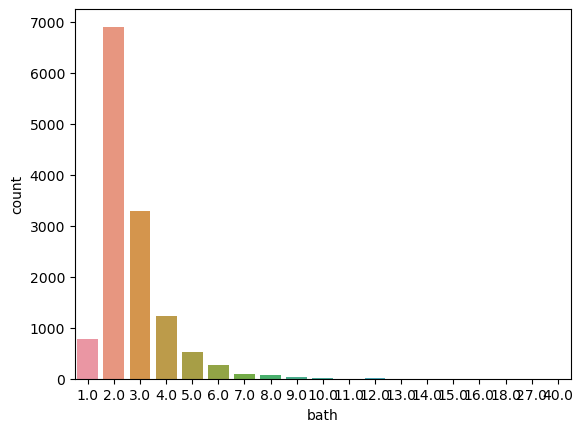

In [18]:
sns.countplot(x='bath', data=data)


In [20]:
data['total_sqft']
data.drop(['availability', 'society'], axis=1, inplace = True)
data.head()


,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [23]:
data.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [25]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  object 
 3   total_sqft  12710 non-null  object 
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(3), object(4)
memory usage: 794.4+ KB


In [27]:
def is_float(x):
    '''Returns true if x if float or else returns false'''
    try:
        float(x)
    except:
        return False
    return True
# check how many object values in the 'total_sqrt' variable are ranges
data[~data['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935


In [28]:
def convert_sqft_to_num(x):
    numbers = x.split("-")
    if(len(numbers) == 2):
        return (float(numbers[0]) + float(numbers[1])) / 2
    try:
        return float(x)
    except:
        return None
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [32]:
data['size'] = data['size'].apply(lambda x: int(x.split(" ")[0]))
data['size'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [33]:
data['location'] = data['location'].apply(lambda x: x.strip())
data['location'].value_counts()

Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1254, dtype: int64

In [35]:
sum(data['location'].value_counts() <= 10)
locations_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_less_than_10 = locations_stats[locations_stats <= 10]
data['location'] = data.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
data['location'].value_counts()

other                        2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: location, Length: 238, dtype: int64

<Axes: xlabel='total_sqft', ylabel='Count'>

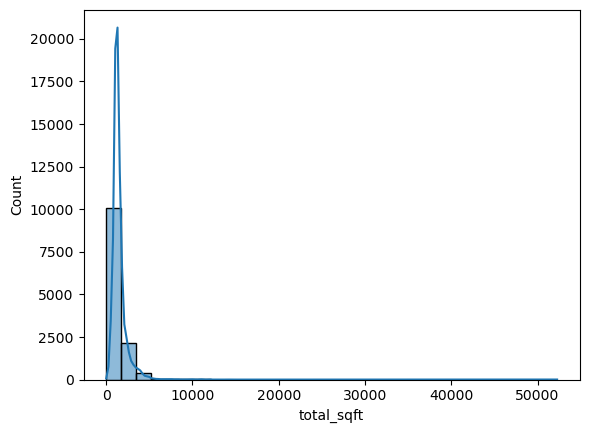

In [37]:
sns.histplot(x='total_sqft', data=data, kde=True, bins=30)

In [38]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [43]:
def remove_pps_outliers(df):
    data_out = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        m = np.mean(subdata.price_per_sqft)
        st = np.std(subdata.price_per_sqft)
        reduced_data = subdata[(subdata.price_per_sqft>(m-st)) & (subdata.price_per_sqft<=(m+st))]
        data_out = pd.concat([data_out, reduced_data], ignore_index=True)
    return data_out
data = remove_pps_outliers(data)
data.drop('price_per_sqft', axis=1, inplace=True)
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0
2,Super built-up Area,1st Block Jayanagar,6,1200.0,6.0,2.0,125.0
3,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0
4,Plot Area,1st Block Jayanagar,7,930.0,4.0,2.0,85.0


In [44]:
dummies_location = pd.get_dummies(data.location)
data = pd.concat([data, dummies_location.drop('other', axis='columns')], axis='columns')

dummies_area_type = pd.get_dummies(data.area_type)
data = pd.concat([data, dummies_area_type.drop('Built-up  Area', axis='columns')], axis='columns')

data.drop(['location', 'area_type'], axis=1, inplace=True)
X = data.drop('price', axis=1)
y = data.price

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.32176999895622027

In [47]:
y_pred=lr.predict(X_test)
print(y_pred)

[ 90.3842798   78.32914347 120.01533098 ...  26.16961078  85.36942752
  20.25699388]


In [48]:
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.34135231, 0.41438126, 0.52994153, 0.4684533 , 0.16769923])